In [1]:
import numpy as np
import networkx as nx

In [2]:
file_path = input("Enter File Path")
with open(file_path) as f:
    line1 = f.readline().split(":")
    total_trans = len(line1[1].split(','))

ls = [[] for i in range(total_trans)]

with open(file_path) as f:
    for i in range(3):
        skip = f.readline()
    line = f.readline()
    while line:
        l1 = line.split(":")
        transaction_no = int(l1[0][1])   
        count = 0
        for i in range(len(ls)):
            if i == transaction_no-1:
                ls[i].append(l1[1][:-2])
            else:
                ls[i].append("NaN")
        line = f.readline()
        
    print(ls)

Enter File Pathschedule1.txt
[['R(A)', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'W(C)'], ['NaN', 'W(D)', 'NaN', 'W(A)', 'R(A)', 'NaN', 'NaN'], ['NaN', 'NaN', 'W(A)', 'NaN', 'NaN', 'R(B)', 'NaN']]


In [3]:
def conflict_check(instruction1, instruction2):
    if instruction1 == "NaN" or instruction2 == "NaN":
        return False
    operator1, operator2 = instruction1[0], instruction2[0]
    data1, data2 = instruction1[2], instruction2[2]
    if operator1 == "W" or operator2 == "W":
        if data1 == data2:
            return True
    return False

In [4]:
G = nx.DiGraph()
for i in range(len(ls)):
    T_id = i
    G.add_node(T_id)
      

In [5]:
# Nodes of graph
G.nodes()

NodeView((0, 1, 2))

In [6]:
length = len(ls[0])     
# Add edge in the graph if instructions are conflicting
for t_id in range(total_trans):
    for i in range(length):
        instruction = ls[t_id][i]
        for j in range(total_trans):
            if j == t_id:
                continue
            else:
                for k in range(i+1,length):
                    if conflict_check(instruction, ls[j][k]):
                        G.add_edge(t_id,j)

In [7]:
# Edges of the graph
G.edges()

OutEdgeView([(0, 1), (0, 2), (2, 1)])

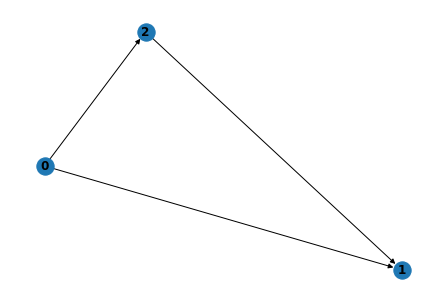

In [8]:
nx.draw(G, with_labels=True, font_weight='bold')
 

In [9]:
# nx.find_cycle(G)
try:
    nx.find_cycle(G)
    print("Not Conflict serializable")
except:
    print("Conflict serializable")

Conflict serializable


In [68]:
# nx.find_cycle(G)